# GBP/INR

In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB 281.8 kB/s eta 0:00:45
   ---------------------------------------- 0.1/12.6 MB 363.1 kB/s eta 0:00:35
   ---------------------------------------- 0.1/12.6 MB 547.6 kB/s eta 0:00:23
    --------------------------------------- 0.2/12.6 MB 700.2 kB/s eta 0:00:18
    --------------------------------------- 0.3/12.6 MB 874.6 kB/s eta 0:00:15
    --------------------------------------- 0.3/12.6 MB 951.8 kB/s eta 0:00:13
   - -------------------------------------- 0.3/12.6 MB 967.8 kB/s eta 0:00:13
   - -------------------------------------- 0.4/12.6 MB 1.0 MB/s eta 0:00:13
   - -------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.5 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.2/11.5 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.2/11.5 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.5 MB 1.4 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.5 MB 1.4 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.5 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.5 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.6/11.5 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/11.5 MB 1.3 MB/s eta 0:00:09
   -- ----------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd


In [7]:
df = pd.read_csv(r'C:\Users\DELL\Documents\GitHub\ForEx\all_data.csv')
df.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR


In [8]:
gbp_inr = df.loc[df['Currency Pair']=='GBP/INR']
gbp_inr.reset_index(drop=True,inplace=True)


In [9]:
import swing_technical_indicators

In [10]:
print(dir(swing_technical_indicators))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_100ema', 'calculate_200ema', 'calculate_50ema', 'calculate_bollinger_bands', 'calculate_macd', 'calculate_rsi', 'calculate_swing_support_resistance', 'indicators']


1. ADFuller Test

In [11]:
gbp_inr['Date']= pd.to_datetime(gbp_inr['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\2091902550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp_inr['Date']= pd.to_datetime(gbp_inr['Date'])


In [13]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.0/9.8 MB 1.4 MB/s eta 0:00:08
   ---------------------------------------- 0.0/9.8 MB 281.8 kB/s eta 0:00:35
    --------------------------------------- 0.1/9.8 MB 658.7 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.8 MB 892.5 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.8 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.4/9.8 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.8 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.8 MB 1.4 MB/s eta 0:00:07
   -- -----------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for i in gbp_inr.columns :
  if i!='Currency Pair' :
    print("ADFuller test for column : ",i)
    check_stationarity(gbp_inr[i])

ADFuller test for column :  Date
ADF Statistic: 0.611725
p-value: 0.987901
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Open_price
ADF Statistic: -1.492510
p-value: 0.537213
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_high
ADF Statistic: -1.501237
p-value: 0.532900
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test for column :  Day_low
ADF Statistic: -1.533992
p-value: 0.516634
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
Non-stationary
ADFuller test fo

# Decomposition

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

def deseasonalize_column(data, column, period=7):
    """
    Deseasonalizes a column by decomposing it into trend, seasonality, and residual components.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the time series data.
    - column (str): The name of the column to deseasonalize.
    - period (int): The periodicity of the data (e.g., 7 for weekly seasonality).

    Returns:
    - pd.Series: The deseasonalized version of the column.
    """
    # Decompose the column
    decomposition = seasonal_decompose(data[column], model='additive', period=period, extrapolate_trend='freq')

    # Extract the residual component as deseasonalized data
    deseasonalized = data[column] - decomposition.seasonal

    return deseasonalized

# Identify non-stationary columns
non_stationary_columns = ['Day_high', 'Day_low', 'Open_price']

# Create deseasonalized columns
for col in non_stationary_columns:
    deseasonalized_col = deseasonalize_column(gbp_inr, col, period=14)  # Adjust the period as needed
    gbp_inr[f'Deseasonalized_{col}'] = deseasonalized_col


C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\597161795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\597161795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp_inr[f'Deseasonalized_{col}'] = deseasonalized_col
C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\597161795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [16]:
gbp_inr

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price
0,2014-11-07,97.6145,97.7156,97.1888,97.4138,GBP/INR,97.755349,97.233863,97.658786
1,2014-11-10,97.4982,97.9802,97.3621,97.5163,GBP/INR,97.976873,97.373775,97.531783
2,2014-11-11,97.6663,98.0336,97.5695,97.9538,GBP/INR,97.995487,97.513126,97.645434
3,2014-11-12,97.8621,98.0328,96.6934,96.7051,GBP/INR,97.947343,96.624402,97.773394
4,2014-11-13,96.7591,97.1627,96.5200,96.6187,GBP/INR,97.070525,96.450502,96.693500
...,...,...,...,...,...,...,...,...,...
2598,2024-10-24,108.5360,109.0908,108.4776,108.9739,GBP/INR,109.093678,108.457246,108.505501
2599,2024-10-25,109.0569,109.2010,108.8772,108.9604,GBP/INR,109.248355,108.929440,109.096727
2600,2024-10-28,108.9347,109.2034,108.7421,108.9970,GBP/INR,109.289768,108.788088,109.006208
2601,2024-10-29,109.0287,109.3196,108.9039,109.3049,GBP/INR,109.412539,109.019762,109.111372


## EMA 100 Feature

In [17]:
gbp_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(gbp_inr, 'Closing_price', 100)
gbp_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\65195806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp_inr['EMA_100'] = swing_technical_indicators.calculate_100ema(gbp_inr, 'Closing_price', 100)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100
0,2014-11-07,97.6145,97.7156,97.1888,97.4138,GBP/INR,97.755349,97.233863,97.658786,97.413800
1,2014-11-10,97.4982,97.9802,97.3621,97.5163,GBP/INR,97.976873,97.373775,97.531783,97.415830
2,2014-11-11,97.6663,98.0336,97.5695,97.9538,GBP/INR,97.995487,97.513126,97.645434,97.426483
3,2014-11-12,97.8621,98.0328,96.6934,96.7051,GBP/INR,97.947343,96.624402,97.773394,97.412198
4,2014-11-13,96.7591,97.1627,96.5200,96.6187,GBP/INR,97.070525,96.450502,96.693500,97.396485
...,...,...,...,...,...,...,...,...,...,...
2598,2024-10-24,108.5360,109.0908,108.4776,108.9739,GBP/INR,109.093678,108.457246,108.505501,108.736356
2599,2024-10-25,109.0569,109.2010,108.8772,108.9604,GBP/INR,109.248355,108.929440,109.096727,108.740793
2600,2024-10-28,108.9347,109.2034,108.7421,108.9970,GBP/INR,109.289768,108.788088,109.006208,108.745866
2601,2024-10-29,109.0287,109.3196,108.9039,109.3049,GBP/INR,109.412539,109.019762,109.111372,108.756936


## EMA 200

In [18]:
gbp_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(gbp_inr, 'Closing_price', 200)
gbp_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\1855213751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp_inr['EMA_200'] = swing_technical_indicators.calculate_200ema(gbp_inr, 'Closing_price', 200)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200
0,2014-11-07,97.6145,97.7156,97.1888,97.4138,GBP/INR,97.755349,97.233863,97.658786,97.413800,97.413800
1,2014-11-10,97.4982,97.9802,97.3621,97.5163,GBP/INR,97.976873,97.373775,97.531783,97.415830,97.414820
2,2014-11-11,97.6663,98.0336,97.5695,97.9538,GBP/INR,97.995487,97.513126,97.645434,97.426483,97.420183
3,2014-11-12,97.8621,98.0328,96.6934,96.7051,GBP/INR,97.947343,96.624402,97.773394,97.412198,97.413068
4,2014-11-13,96.7591,97.1627,96.5200,96.6187,GBP/INR,97.070525,96.450502,96.693500,97.396485,97.405163
...,...,...,...,...,...,...,...,...,...,...,...
2598,2024-10-24,108.5360,109.0908,108.4776,108.9739,GBP/INR,109.093678,108.457246,108.505501,108.736356,107.308195
2599,2024-10-25,109.0569,109.2010,108.8772,108.9604,GBP/INR,109.248355,108.929440,109.096727,108.740793,107.324635
2600,2024-10-28,108.9347,109.2034,108.7421,108.9970,GBP/INR,109.289768,108.788088,109.006208,108.745866,107.341275
2601,2024-10-29,109.0287,109.3196,108.9039,109.3049,GBP/INR,109.412539,109.019762,109.111372,108.756936,107.360814


## EMA 50

In [19]:
gbp_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(gbp_inr, 'Closing_price', 50)
gbp_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\1005828698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp_inr['EMA_50'] = swing_technical_indicators.calculate_100ema(gbp_inr, 'Closing_price', 50)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50
0,2014-11-07,97.6145,97.7156,97.1888,97.4138,GBP/INR,97.755349,97.233863,97.658786,97.413800,97.413800,97.413800
1,2014-11-10,97.4982,97.9802,97.3621,97.5163,GBP/INR,97.976873,97.373775,97.531783,97.415830,97.414820,97.417820
2,2014-11-11,97.6663,98.0336,97.5695,97.9538,GBP/INR,97.995487,97.513126,97.645434,97.426483,97.420183,97.438838
3,2014-11-12,97.8621,98.0328,96.6934,96.7051,GBP/INR,97.947343,96.624402,97.773394,97.412198,97.413068,97.410064
4,2014-11-13,96.7591,97.1627,96.5200,96.6187,GBP/INR,97.070525,96.450502,96.693500,97.396485,97.405163,97.379030
...,...,...,...,...,...,...,...,...,...,...,...,...
2598,2024-10-24,108.5360,109.0908,108.4776,108.9739,GBP/INR,109.093678,108.457246,108.505501,108.736356,107.308195,109.626579
2599,2024-10-25,109.0569,109.2010,108.8772,108.9604,GBP/INR,109.248355,108.929440,109.096727,108.740793,107.324635,109.600455
2600,2024-10-28,108.9347,109.2034,108.7421,108.9970,GBP/INR,109.289768,108.788088,109.006208,108.745866,107.341275,109.576790
2601,2024-10-29,109.0287,109.3196,108.9039,109.3049,GBP/INR,109.412539,109.019762,109.111372,108.756936,107.360814,109.566127


## RSI Feature

In [20]:
gbp_inr['RSI'] = swing_technical_indicators.calculate_rsi(gbp_inr,'Closing_price',21)
gbp_inr

C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\3390386479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp_inr['RSI'] = swing_technical_indicators.calculate_rsi(gbp_inr,'Closing_price',21)


,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI
0,2014-11-07,97.6145,97.7156,97.1888,97.4138,GBP/INR,97.755349,97.233863,97.658786,97.413800,97.413800,97.413800,0.000000
1,2014-11-10,97.4982,97.9802,97.3621,97.5163,GBP/INR,97.976873,97.373775,97.531783,97.415830,97.414820,97.417820,0.000000
2,2014-11-11,97.6663,98.0336,97.5695,97.9538,GBP/INR,97.995487,97.513126,97.645434,97.426483,97.420183,97.438838,0.000000
3,2014-11-12,97.8621,98.0328,96.6934,96.7051,GBP/INR,97.947343,96.624402,97.773394,97.412198,97.413068,97.410064,0.000000
4,2014-11-13,96.7591,97.1627,96.5200,96.6187,GBP/INR,97.070525,96.450502,96.693500,97.396485,97.405163,97.379030,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,2024-10-24,108.5360,109.0908,108.4776,108.9739,GBP/INR,109.093678,108.457246,108.505501,108.736356,107.308195,109.626579,33.702655
2599,2024-10-25,109.0569,109.2010,108.8772,108.9604,GBP/INR,109.248355,108.929440,109.096727,108.740793,107.324635,109.600455,25.845916
2600,2024-10-28,108.9347,109.2034,108.7421,108.9970,GBP/INR,109.289768,108.788088,109.006208,108.745866,107.341275,109.576790,27.177412
2601,2024-10-29,109.0287,109.3196,108.9039,109.3049,GBP/INR,109.412539,109.019762,109.111372,108.756936,107.360814,109.566127,29.341373


In [24]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import plotly.express as px
px.line(gbp_inr['RSI'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=RSI<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'RSI',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'RSI',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ..., 2600, 2601, 2602]),
              'xaxis': 'x',
              'y': array([ 0.        ,  0.        ,  0.        , ..., 27.17741164, 29.34137291,
                          32.45190685]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

## MACD

In [26]:
gbp_inr_macd = swing_technical_indicators.calculate_macd(gbp_inr, column_name='Closing_price', short_period=12, long_period=26, signal_period=9)

for i in gbp_inr_macd.columns:

    gbp_inr[f"{i}"] = gbp_inr_macd[f'{i}']

gbp_inr


C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\3019586027.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\3019586027.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_10684\3019586027.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram
0,2014-11-07,97.6145,97.7156,97.1888,97.4138,GBP/INR,97.755349,97.233863,97.658786,97.413800,97.413800,97.413800,0.000000,0.000000,0.000000,0.000000
1,2014-11-10,97.4982,97.9802,97.3621,97.5163,GBP/INR,97.976873,97.373775,97.531783,97.415830,97.414820,97.417820,0.000000,0.008177,0.001635,0.006541
2,2014-11-11,97.6663,98.0336,97.5695,97.9538,GBP/INR,97.995487,97.513126,97.645434,97.426483,97.420183,97.438838,0.000000,0.049390,0.011186,0.038204
3,2014-11-12,97.8621,98.0328,96.6934,96.7051,GBP/INR,97.947343,96.624402,97.773394,97.412198,97.413068,97.410064,0.000000,-0.018495,0.005250,-0.023745
4,2014-11-13,96.7591,97.1627,96.5200,96.6187,GBP/INR,97.070525,96.450502,96.693500,97.396485,97.405163,97.379030,0.000000,-0.078362,-0.011472,-0.066890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,2024-10-24,108.5360,109.0908,108.4776,108.9739,GBP/INR,109.093678,108.457246,108.505501,108.736356,107.308195,109.626579,33.702655,-0.383433,-0.230280,-0.153154
2599,2024-10-25,109.0569,109.2010,108.8772,108.9604,GBP/INR,109.248355,108.929440,109.096727,108.740793,107.324635,109.600455,25.845916,-0.389490,-0.262122,-0.127368
2600,2024-10-28,108.9347,109.2034,108.7421,108.9970,GBP/INR,109.289768,108.788088,109.006208,108.745866,107.341275,109.576790,27.177412,-0.386877,-0.287073,-0.099805
2601,2024-10-29,109.0287,109.3196,108.9039,109.3049,GBP/INR,109.412539,109.019762,109.111372,108.756936,107.360814,109.566127,29.341373,-0.355860,-0.300830,-0.055029


## Bollinger Bands

In [27]:
bollinger_data = swing_technical_indicators.calculate_bollinger_bands(gbp_inr['Closing_price'])

gbp_inr = gbp_inr.join(bollinger_data)
gbp_inr.drop('Price',axis=1, inplace=True)

c:\Users\DELL\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:202: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\DELL\Documents\GitHub\ForEx\swing_technical_indicators\indicators.py:203: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [28]:

X1 = gbp_inr.drop(['Date','Open_price','Day_high','Day_low','Closing_price','Currency Pair'],axis=1)
y =gbp_inr['Closing_price']

## Scaling

In [32]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 812.7 kB/s eta 0:00:14
   ---------------------------------------- 0.1/11.0 MB 751.6 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.0 MB 1.0 MB/s eta 0:00:11
    --------------------------------------- 0.3/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.0 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/11.0 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/11.0 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.0 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.0 MB 1.7 MB/s eta 0:00:07
   -- --


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X1)
X= pd.DataFrame(X,columns = X1.columns)

## Supervised ML Models

In [34]:
#Step 2: Define the model functions
# Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
def random_forest_model(X,y):
    rf = RandomForestRegressor()
    rf_metrics = {}


    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

        # Fit the model
    rf.fit(X_train, y_train)

        # Predict and calculate MAE
    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R^2): {r2} ")

    rf_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nRandom Forest Metrics :", rf_metrics)






random_forest_model(X,y)



Mean Absolute Error : 0.23896864276568258
Mean Absolute Percentage Error (MAPE): 0.2509673210080118%
R-squared (R^2): 0.9978708757206555 

Random Forest Metrics : {'MACD_Histogram': {'MAE': np.float64(0.23896864276568258), 'MAPE': np.float64(0.2509673210080118), 'R^2': 0.9978708757206555}}


## SVM

In [35]:
from sklearn.svm import SVR
# SVM Model
def svm_model(X,y):
    svm = SVR()
    svm_metrics = {}



    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)



    # Train the model
    svm.fit(X_train, y_train)

    # Predict
    y_pred = svm.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error : {mape * 100}%")
    print(f"R-squared (R^2) : {r2}")

    svm_metrics = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nSVM Metrics :", svm_metrics)


svm_model(X,y)

Mean Absolute Error : 0.26960366905952854
Mean Absolute Percentage Error : 0.2845008376295424%
R-squared (R^2) : 0.9969944398303027

SVM Metrics : {'MAE': np.float64(0.26960366905952854), 'MAPE': np.float64(0.2845008376295424), 'R^2': 0.9969944398303027}


## Hyperparameter tuning for SVM

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def svm_model_with_hyperparameter_tuning(X,y):


    # Initialize the SVM model
    svm = SVR()
    svm_metrics = {}

    # Define the hyperparameter grid to search over
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf'],  # Kernel types
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
        'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter in the loss function
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)



    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


    # Perform GridSearchCV to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters : {best_params}")

    # Get the best model
    best_svm = grid_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_svm.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
    r2 = r2_score(y_test, y_pred)

    # Store the metrics for each currency pair
    svm_metrics= {
        'MAE': mae,
        'MAPE': mape,
        'R^2': r2
    }

    print(f"MAE : {mae}")
    print(f"MAPE : {mape}%")
    print(f"R^2 : {r2}")

# Return the metrics for all currency pairs
    return svm_metrics

svm_model_with_hyperparameter_tuning(X,y)

KeyboardInterrupt: 

## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def gradient_boosting_model(X,y):

    gb = GradientBoostingRegressor()
    gb_metrics = {}




    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)



        # Train the model
    gb.fit(X_train, y_train)

    # Predict
    y_pred = gb.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R^2): {r2}")

    gb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nGradient Boosting Metrics ", gb_metrics)


gradient_boosting_model(X,y)

Mean Absolute Error: 0.2524626101105827
Mean Absolute Percentage Error (MAPE): 0.2658188352366509%
R-squared (R^2): 0.9977222705990688

Gradient Boosting Metrics  {'MACD_Histogram': {'MAE': np.float64(0.2524626101105827), 'MAPE': np.float64(0.2658188352366509), 'R^2': 0.9977222705990688}}


## KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor


def knn_model(X,y):
    knn = KNeighborsRegressor()
    knn_metrics = {}



    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

    # Train the model
    knn.fit(X_train, y_train)

    # Predict
    y_pred = knn.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"R-squared (R^2): {r2}")

    knn_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nKNN Metrics for each currency pair:", knn_metrics)


knn_model(X,y)

Mean Absolute Error : 0.340236517285531
Mean Absolute Percentage Error (MAPE) : 0.36000875109848596%
R-squared (R^2): 0.9961591572603488

KNN Metrics for each currency pair: {'MACD_Histogram': {'MAE': np.float64(0.340236517285531), 'MAPE': np.float64(0.36000875109848596), 'R^2': 0.9961591572603488}}


## XGBoost

In [39]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 281.8 kB/s eta 0:07:24
   ---------------------------------------- 0.1/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 476.3 kB/s eta 0:04:23
   ---------------------------------------- 0.1/124.9 MB 423.5 kB/s eta 0:04:55
   ---------------------------------------- 0.2/124.9 MB 689.2 kB/s eta 0:03:01
   ---------------------------------------- 0.2/124.9 MB 689.2 kB/s eta 0:03:01
   ---------------------------------------- 0.2/124.9 MB 689.2 kB/s eta 0:03:01
   ---------------------------------------- 0.3/124.9 MB 632.7 kB/s et


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

def xgboost_model(X,y):
    # Split the data by currency pair
    xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
    xgb_metrics = {}



    # Prepare data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

    # Train the model
    xgb.fit(X_train, y_train)

    # Predict
    y_pred = xgb.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error : {mae}")
    print(f"Mean Absolute Percentage Error (MAPE) : {mape * 100}%")
    print(f"R-squared (R^2) : {r2}")

    xgb_metrics[i] = {'MAE': mae, 'MAPE': mape * 100, 'R^2': r2}

    print("\nXGBoost Metrics :", xgb_metrics)



xgboost_model(X,y)


Mean Absolute Error : 0.2517749309466529
Mean Absolute Percentage Error (MAPE) : 0.26633501978314633%
R-squared (R^2) : 0.997725754144445

XGBoost Metrics : {'MACD_Histogram': {'MAE': np.float64(0.2517749309466529), 'MAPE': np.float64(0.26633501978314633), 'R^2': 0.997725754144445}}


## LightGBM

In [41]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 495.5 kB/s eta 0:00:03
   - -------------------------------------- 0.0/1.4 MB 495.5 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 476.3 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 607.9 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 808.4 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 808.4 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 808.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 680.9 kB/s eta 0:00:02
   --------- -------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def lightgbm_model(X,y):
    """
    Train and evaluate a LightGBM model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics.
    """
    # Initialize the LightGBM Regressor
    lgbm = LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=-1)



    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    lgbm.fit(X_train, y_train)

    # Make predictions
    y_train_pred=lgbm.predict(X_train)
    y_pred = lgbm.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print("LightGBM Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²): {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

# Example usage
lightgbm_model(X,y)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 2082, number of used features: 13
[LightGBM] [Info] Start training from score 95.580743
LightGBM Model Metrics:
Mean Absolute Error (MAE): 0.24197657158403355
Mean Absolute Percentage Error (MAPE): 0.2553108752532175%
R-squared (R²): 0.9979709532334654
Training Accuracy (R²): 0.9994320453772412
Testing Accuracy (R²): 0.9979709532334654


## CatBoost

In [43]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     -------------- ------------------------ 61.4/167.9 kB 1.7 MB/s eta 0:00:01
     --------------------- ----------------- 92.2/167.9 kB 1.1 MB/s eta 0:00:01
     --------------------- ----------------- 92.2/167.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 167.9/167.9 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 6.4 MB/s eta 0:00:16
   ---------------------------------------- 0.1/101.7 MB 6.4 MB/s eta 0:00:16

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

def catboost_model(X,y):
    """
    Train and evaluate a CatBoost model for predicting Closing_price.

    Parameters:
    - data (pd.DataFrame): The input dataset, with target variable and features.

    Returns:
    - None. Prints the evaluation metrics, training, and testing accuracy scores.
    """
    # Initialize the CatBoost Regressor
    catboost = CatBoostRegressor(
        l2_leaf_reg=15,
        iterations=1000,
        learning_rate=0.1,
        depth=10,
        loss_function='MAE',  # Can be changed to 'RMSE', etc., as needed
        verbose=0  # Set to 0 to suppress training logs
    )


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the model
    catboost.fit(X_train, y_train)

    # Make predictions
    y_train_pred = catboost.predict(X_train)  # Predictions on training data
    y_test_pred = catboost.predict(X_test)   # Predictions on testing data

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    # Calculate accuracy scores for training and testing
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the metrics
    print(catboost.get_feature_importance())
    print("CatBoost Model Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R-squared (R²) on Test Data: {r2}")
    print(f"Training Accuracy (R²): {train_r2}")
    print(f"Testing Accuracy (R²): {test_r2}")

# Example usage
catboost_model(X,y)


[ 9.10676415 11.47951109  7.95677465 20.84987737  3.6192939  14.49805574
  3.97757768  3.2893748   7.39124175  4.90585296  4.96569462  3.33903968
  4.62094163]
CatBoost Model Metrics:
Mean Absolute Error (MAE): 0.0019082141974858138
Mean Absolute Percentage Error (MAPE): 0.31229373436039604%
R-squared (R²) on Test Data: 0.9976060780044057
Training Accuracy (R²): 0.999879402667912
Testing Accuracy (R²): 0.9976060780044057


In [44]:
data = X.select_dtypes('number')
co = data.corr()
px.imshow(co)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array(['Deseasonalized_Day_high', 'Deseasonalized_Day_low',
                          'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
                          'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
                          'Lower Band'], dtype=object),
              'xaxis': 'x',
              'y': array(['Deseasonalized_Day_high', 'Deseasonalized_Day_low',
                          'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
                          'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
                          'Lower Band'], dtype=object),
              'yaxis': 'y',
              'z': array([[ 1.        ,  0.99790351,  0.99851641,  0.95023016,  0.90469065,
                            0.97356174,  0.19790741,  0.28054886,  0.29417248,  0.025713  ,
                            0.98408348,  0.97247482,  0.97380526],
                          [ 0.99790351,  1.        ,  0.99847411,  0.94869813,  0.90150556,
                            0.97290391,  0.19831121,  0.28209243,  0.29530438,  0.02716989,
                            0.98365013,  0.96916678,  0.97614022],
                          [ 0.99851641,  0.99847411,  1.        ,  0.95001248,  0.90360852,
                            0.97384063,  0.19346996,  0.28206702,  0.29704611,  0.0223874 ,
                            0.9845972 ,  0.97152791,  0.9757096 ],
                          [ 0.95023016,  0.94869813,  0.95001248,  1.        ,  0.98458189,
                            0.99211589, -0.01170794,  0.00429391,  0.02966212, -0.06761664,
                            0.97214525,  0.96372863,  0.95906341],
                          [ 0.90469065,  0.90150556,  0.90360852,  0.98458189,  1.        ,
                            0.95800667, -0.03882684, -0.04468253, -0.03120911, -0.04638112,
                            0.92769585,  0.92281674,  0.91218649],
                          [ 0.97356174,  0.97290391,  0.97384063,  0.99211589,  0.95800667,
                            1.        ,  0.02410105,  0.06902645,  0.10780041, -0.08942416,
                            0.99237805,  0.98176259,  0.9809661 ],
                          [ 0.19790741,  0.19831121,  0.19346996, -0.01170794, -0.03882684,
                            0.02410105,  1.        ,  0.79268968,  0.67396208,  0.49764251,
                            0.07277571,  0.07767364,  0.06649108],
                          [ 0.28054886,  0.28209243,  0.28206702,  0.00429391, -0.04468253,
                            0.06902645,  0.79268968,  1.        ,  0.93992655,  0.38530549,
                            0.15246361,  0.14010163,  0.16100914],
                          [ 0.29417248,  0.29530438,  0.29704611,  0.02966212, -0.03120911,
                            0.10780041,  0.67396208,  0.93992655,  1.        ,  0.04714012,
                            0.21213314,  0.20051466,  0.21866637],
                          [ 0.025713  ,  0.02716989,  0.0223874 , -0.06761664, -0.04638112,
                           -0.08942416,  0.49764251,  0.38530549,  0.04714012,  1.        ,
                           -0.12730811, -0.1320736 , -0.11996363],
                          [ 0.98408348,  0.98365013,  0.9845972 ,  0.97214525,  0.92769585,
                            0.99237805,  0.07277571,  0.15246361,  0.21213314, -0.12730811,
                            1.        ,  0.98842466,  0.98934337],
                          [ 0.97247482,  0.96916678,  0.97152791,  0.96372863,  0.92281674,
                            0.98176259,  0.07767364,  0.14010163,  0.20051466, -0.1320736 ,
                            0.98842466,  1.        ,  0.95580186],
                          [ 0.97380526,  0.97614022,  0.9757096 ,  0.95906341,  0.91218649,
              

## Linear Regression

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
print(f"Train Accuracy (R-squared): {train_accuracy}")
print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the coefficients of the model:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Absolute Error: 0.1793730858034675
Mean Squared Error: 0.06567365835174105
R-squared (Test): 0.9986336296242324
Train Accuracy (R-squared): 0.9988853105276255
Test Accuracy (R-squared): 0.9986336296242324
Coefficients: [ 15.90593537  18.08000786 -19.16504849   0.4300497    0.29551895
  -9.21876987   0.40139777   1.2649868   -0.71522787   5.15359773
   8.47708089   8.29310823   8.37609127]
Intercept: 76.5882916613379


## MLPRegressor

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' where the last column is the target variable 'y'
# and all other columns are the features 'X'

# Example DataFrame (replace with your actual data)
# df = pd.read_csv('your_data.csv')


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor (Neural Network model)

mlp_model = MLPRegressor(hidden_layer_sizes=(150,), max_iter=2000, random_state=42,activation= 'relu')

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = mlp_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate train and test accuracy (R-squared values)
train_accuracy = mlp_model.score(X_train, y_train)
test_accuracy = mlp_model.score(X_test, y_test)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Test): {r2}")
print(f"Train Accuracy (R-squared): {train_accuracy}")
print(f"Test Accuracy (R-squared): {test_accuracy}")

# If you want to see the weights of the model:
print(f"Coefs: {mlp_model.coefs_}")
print(f"Intercepts: {mlp_model.intercepts_}")


Mean Absolute Error: 0.25389578385218053
Mean Squared Error: 0.11730349077676286
R-squared (Test): 0.9975594474437065
Train Accuracy (R-squared): 0.997664549563259
Test Accuracy (R-squared): 0.9975594474437065
Coefs: [array([[ 1.59216702e-001,  2.21006690e-259, -1.05225969e-001, ...,
         2.04843394e-001,  2.33949742e-002,  2.66065702e-278],
       [ 3.77731647e-001, -5.43118359e-276, -1.22409352e-001, ...,
         1.10280851e-001,  2.61051038e-001, -4.39796345e-263],
       [-1.19666748e-001,  2.29696747e-290,  2.27944257e-002, ...,
         1.32757693e-001, -4.32228899e-002,  1.30943249e-262],
       ...,
       [ 2.02467564e-001, -1.37993963e-290,  3.96351751e-002, ...,
         3.18938816e-001,  3.13500985e-001, -1.15105655e-279],
       [ 5.05889535e-002, -2.44418894e-280,  3.69648495e-002, ...,
         6.47945862e-002,  8.43603417e-002, -6.19813751e-257],
       [ 3.70253376e-001, -1.92321508e-277,  3.80416452e-002, ...,
         5.88370574e-002,  1.39251458e-001,  1.092399

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-pack

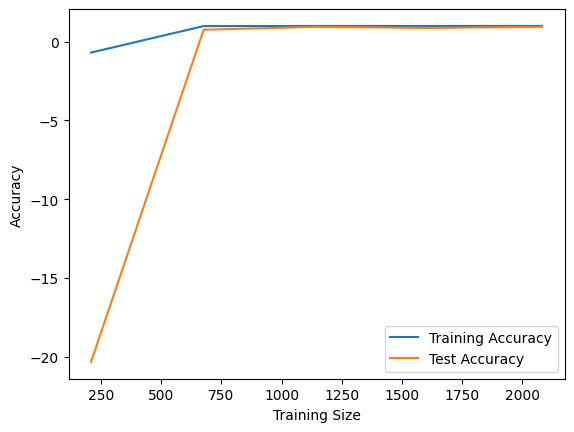

In [47]:
# Example of plotting learning curves using cross-validation
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Deep Learning Models**


## RNN

In [ ]:
pip

In [48]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 409.3 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   --------------------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0750 - mae: 0.1986 - val_loss: 0.0045 - val_mae: 0.0548
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mae: 0.0584 - val_loss: 0.0055 - val_mae: 0.0633
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mae: 0.0483 - val_loss: 0.0059 - val_mae: 0.0673
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0400 - val_loss: 0.0092 - val_mae: 0.0844
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mae: 0.0378 - val_loss: 0.0087 - val_mae: 0.0831
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mae: 0.0362 - val_loss: 0.0083 - val_mae: 0.0808
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mae: 0.0332 - val_loss: 0.0093 - val_mae: 0.0866
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 0.0071 - val_mae: 0.0752
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mae: 0.0322 - v

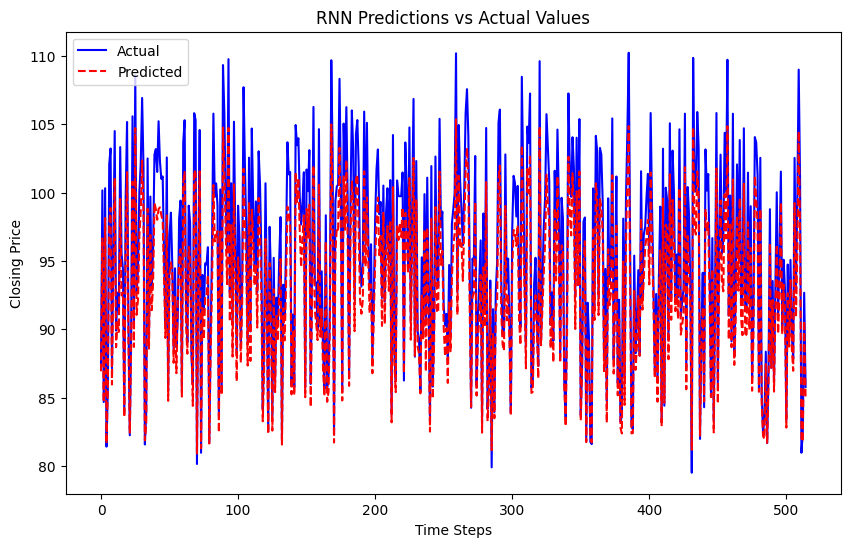

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in gbp_inr.columns if col not in ['Date', target]]

# Separate X and y
X = gbp_inr[features]
y = gbp_inr[target].values
X= X.select_dtypes('number').values
# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("RNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## LSTM

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0325 - mae: 0.1289 - val_loss: 0.0025 - val_mae: 0.0408
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043 - mae: 0.0494 - val_loss: 0.0084 - val_mae: 0.0807
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - mae: 0.0400 - val_loss: 0.0048 - val_mae: 0.0585
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025 - mae: 0.0374 - val_loss: 0.0063 - val_mae: 0.0689
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025 - mae: 0.0369 - val_loss: 0.0048 - val_mae: 0.0593
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - mae: 0.0328 - val_loss: 0.0028 - val_mae: 0.0434
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - mae: 0.0331 - val_loss: 0.0056 - val_mae: 0.0646
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - mae: 0.0295 - val_loss: 0.0069 - val_mae: 0.0732
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mae: 0.0280

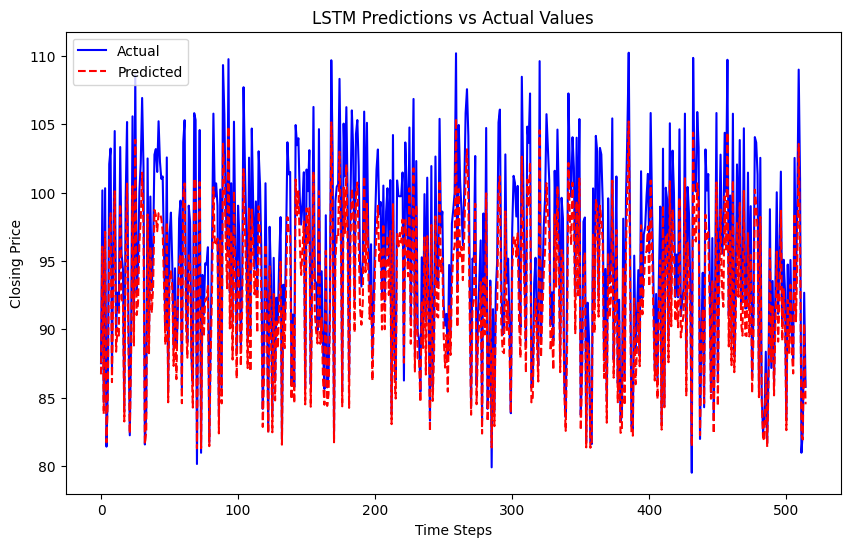

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in gbp_inr.columns if col not in ['Date', target]]

# Separate X and y
X = gbp_inr[features]
y = gbp_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        # Add sequences from X
        X_seq.append(X[i:i + sequence_length])
        # Add the corresponding target from y
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("LSTM Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## GRU

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0655 - mae: 0.1849 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0050 - mae: 0.0543 - val_loss: 0.0033 - val_mae: 0.0480
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034 - mae: 0.0437 - val_loss: 0.0018 - val_mae: 0.0338
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0057 - val_mae: 0.0665
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - mae: 0.0349 - val_loss: 0.0055 - val_mae: 0.0650
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - mae: 0.0319 - val_loss: 0.0078 - val_mae: 0.0782
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - mae: 0.0307 - val_loss: 0.0072 - val_mae: 0.0748
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - mae: 0.0292 - val_loss: 0.0065 - val_mae: 0.0712
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - mae: 0.

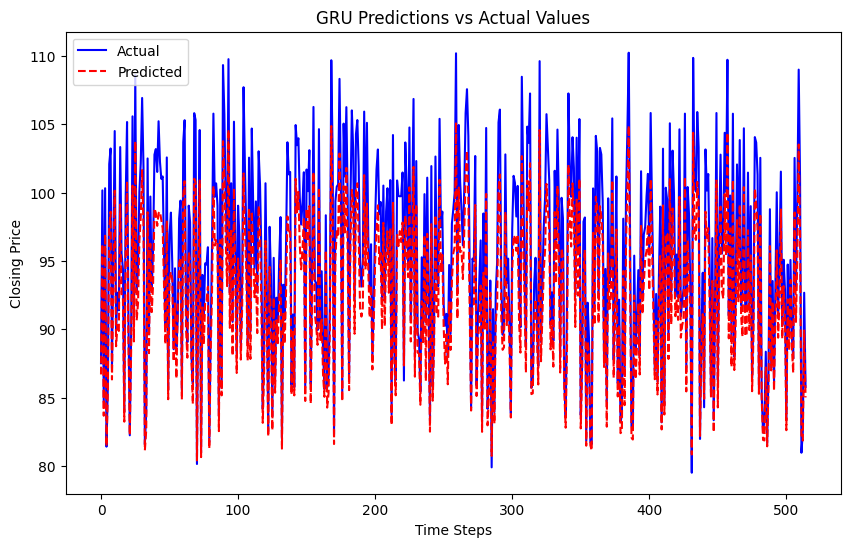

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in gbp_inr.columns if col not in ['Date', target]]

# Separate X and y
X = gbp_inr[features]
y = gbp_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=False),
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = gru_model.evaluate(X_train, y_train)
test_loss, test_mae = gru_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_gru = gru_model.predict(X_test)
y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_gru_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("GRU Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## CNN

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0682 - mae: 0.1785 - val_loss: 0.0036 - val_mae: 0.0452
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mae: 0.0614 - val_loss: 0.0027 - val_mae: 0.0402
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - mae: 0.0501 - val_loss: 0.0025 - val_mae: 0.0380
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - mae: 0.0453 - val_loss: 0.0016 - val_mae: 0.0299
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - mae: 0.0438 - val_loss: 0.0015 - val_mae: 0.0289
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0013 - val_mae: 0.0268
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0011 - val_mae: 0.0248
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - mae: 0.0375 - val_loss: 0.0012 - val_mae: 0.0264
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mae: 0.0353 - va

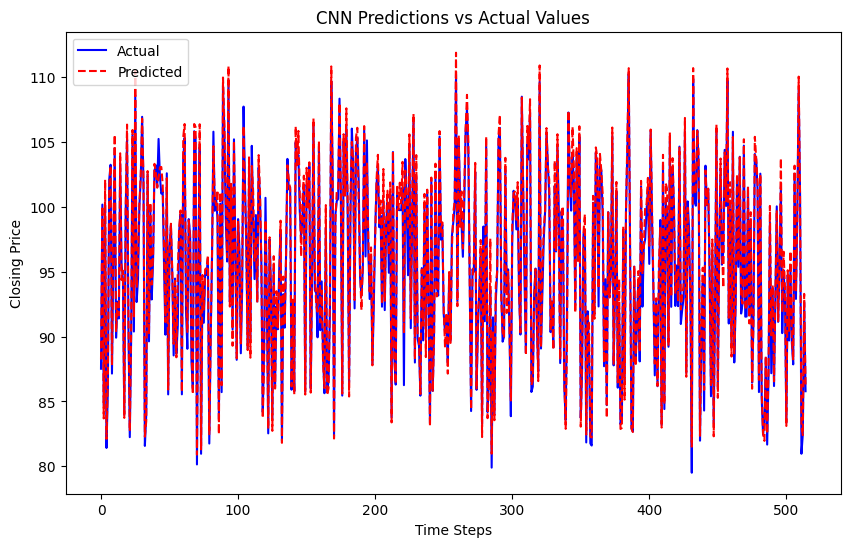

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in gbp_inr.columns if col not in ['Date', target]]

# Separate X and y
X = gbp_inr[features]
y = gbp_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## CNN_LSTM

Epoch 1/20


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0539 - mae: 0.1571 - val_loss: 0.0020 - val_mae: 0.0345
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mae: 0.0418 - val_loss: 0.0022 - val_mae: 0.0368
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mae: 0.0381 - val_loss: 0.0023 - val_mae: 0.0379
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mae: 0.0352 - val_loss: 0.0024 - val_mae: 0.0394
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0029 - val_mae: 0.0432
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mae: 0.0362 - val_loss: 0.0023 - val_mae: 0.0382
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mae: 0.0327 - val_loss: 0.0026 - val_mae: 0.0407
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 0.0018 - val_mae: 0.0331
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - mae: 0.0326 - v

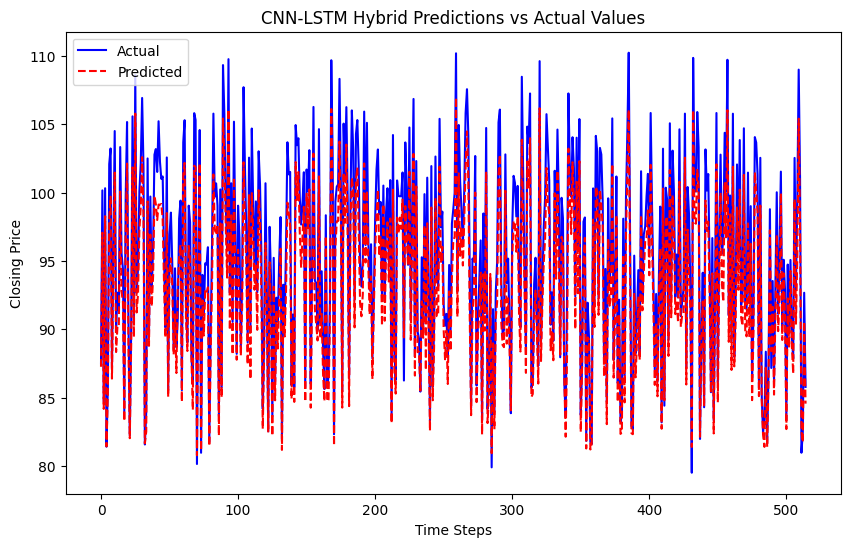

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout

# Define features (X) and target (y)
target = 'Closing_price'  # Change to your target column
features = [col for col in gbp_inr.columns if col not in ['Date', target]]

# Separate X and y
X = gbp_inr[features]
y = gbp_inr[target].values
X = X.select_dtypes('number').values

# Normalize X and y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Create sequences
sequence_length = 30

def create_sequences(X, y, sequence_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i + sequence_length])
        y_seq.append(y[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build CNN-LSTM hybrid model
cnn_lstm_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
    MaxPooling1D(2),
    Dropout(0.2),  # Regularization
    LSTM(64, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_mae = cnn_lstm_model.evaluate(X_train, y_train)
test_loss, test_mae = cnn_lstm_model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_rescaled = scaler_y.inverse_transform(y_pred_cnn_lstm.reshape(-1, 1))

# Rescale actual test data for comparison
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual", color="blue")
plt.plot(y_pred_cnn_lstm_rescaled, label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("CNN-LSTM Hybrid Predictions vs Actual Values")
plt.xlabel("Time Steps")
plt.ylabel("Closing Price")
plt.show()


## SARIMA

In [55]:
gbp_inr

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_100,EMA_200,EMA_50,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,2014-11-07,97.6145,97.7156,97.1888,97.4138,GBP/INR,97.755349,97.233863,97.658786,97.413800,97.413800,97.413800,0.000000,0.000000,0.000000,0.000000,97.032375,97.875611,96.189139
1,2014-11-10,97.4982,97.9802,97.3621,97.5163,GBP/INR,97.976873,97.373775,97.531783,97.415830,97.414820,97.417820,0.000000,0.008177,0.001635,0.006541,97.032375,97.875611,96.189139
2,2014-11-11,97.6663,98.0336,97.5695,97.9538,GBP/INR,97.995487,97.513126,97.645434,97.426483,97.420183,97.438838,0.000000,0.049390,0.011186,0.038204,97.032375,97.875611,96.189139
3,2014-11-12,97.8621,98.0328,96.6934,96.7051,GBP/INR,97.947343,96.624402,97.773394,97.412198,97.413068,97.410064,0.000000,-0.018495,0.005250,-0.023745,97.032375,97.875611,96.189139
4,2014-11-13,96.7591,97.1627,96.5200,96.6187,GBP/INR,97.070525,96.450502,96.693500,97.396485,97.405163,97.379030,0.000000,-0.078362,-0.011472,-0.066890,97.032375,97.875611,96.189139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,2024-10-24,108.5360,109.0908,108.4776,108.9739,GBP/INR,109.093678,108.457246,108.505501,108.736356,107.308195,109.626579,33.702655,-0.383433,-0.230280,-0.153154,109.950910,111.876910,108.024910
2599,2024-10-25,109.0569,109.2010,108.8772,108.9604,GBP/INR,109.248355,108.929440,109.096727,108.740793,107.324635,109.600455,25.845916,-0.389490,-0.262122,-0.127368,109.805850,111.554807,108.056893
2600,2024-10-28,108.9347,109.2034,108.7421,108.9970,GBP/INR,109.289768,108.788088,109.006208,108.745866,107.341275,109.576790,27.177412,-0.386877,-0.287073,-0.099805,109.656835,111.109562,108.204108
2601,2024-10-29,109.0287,109.3196,108.9039,109.3049,GBP/INR,109.412539,109.019762,109.111372,108.756936,107.360814,109.566127,29.341373,-0.355860,-0.300830,-0.055029,109.551580,110.752735,108.350425


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



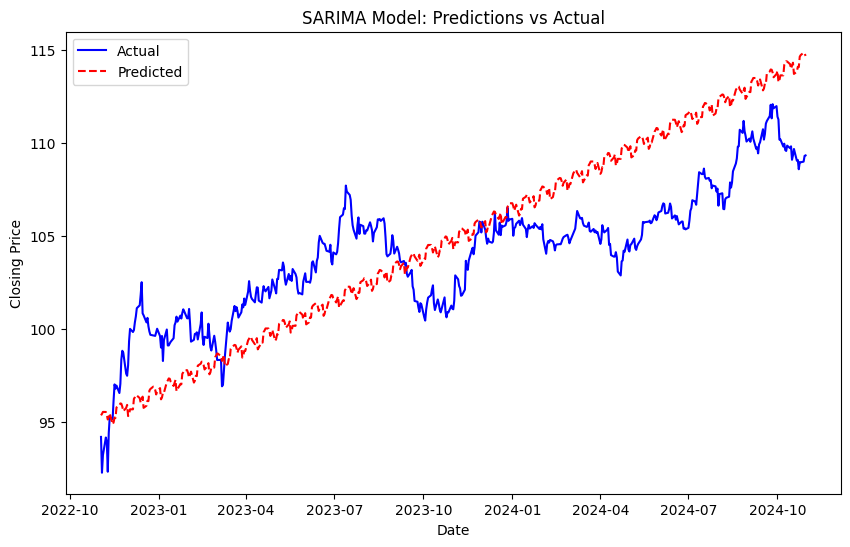

                                     SARIMAX Results                                      
Dep. Variable:                      Closing_price   No. Observations:                 2082
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2072.020
Date:                            Sun, 24 Nov 2024   AIC                           4156.041
Time:                                    15:46:23   BIC                           4189.809
Sample:                                         0   HQIC                          4168.423
                                           - 2082                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric  9.016e-08   3.09e-07      0.292      0.770   -5.15e-07    6.95e-07
ar.L1            0.6237      

In [56]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assume jpy_inr is your DataFrame with the 'Date' column and target 'Closing_price'
# Ensure 'Date' is in datetime format
gbp_inr['Date'] = pd.to_datetime(gbp_inr['Date'])

# Convert 'Date' to numeric (timestamp)
gbp_inr['Date_numeric'] = gbp_inr['Date'].apply(lambda x: x.timestamp())

# Set the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(gbp_inr) * 0.8)
train, test = gbp_inr[:train_size], gbp_inr[train_size:]

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target],
                       order=(1, 1, 1),  # AR, I, MA order
                       seasonal_order=(1, 1, 1, 12),  # Seasonal order
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



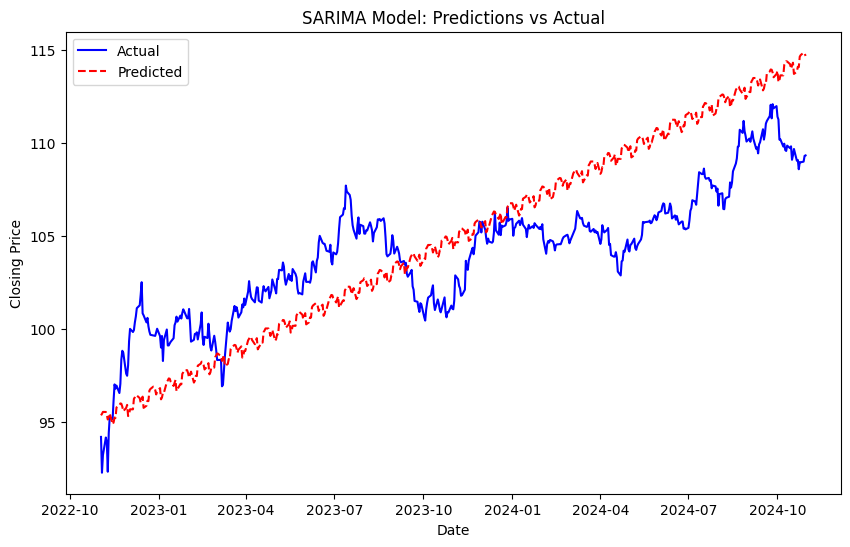

Root Mean Squared Error (RMSE): 3.2490


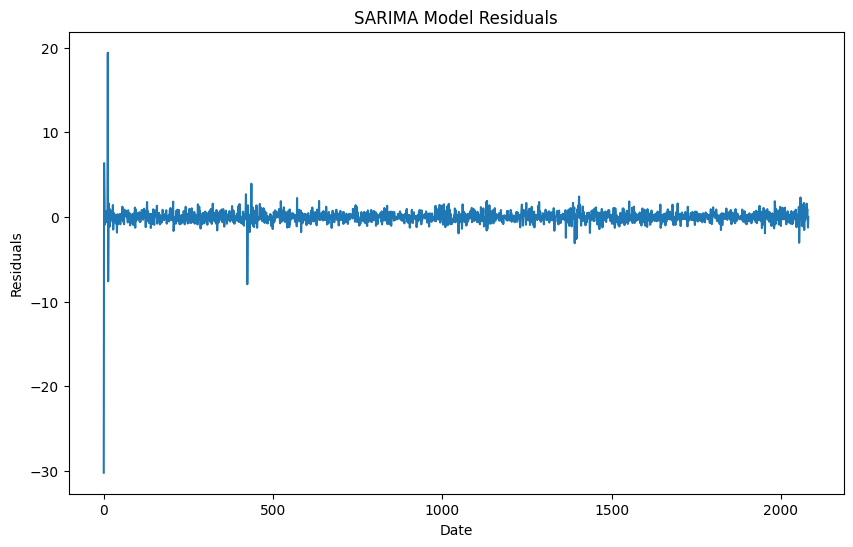

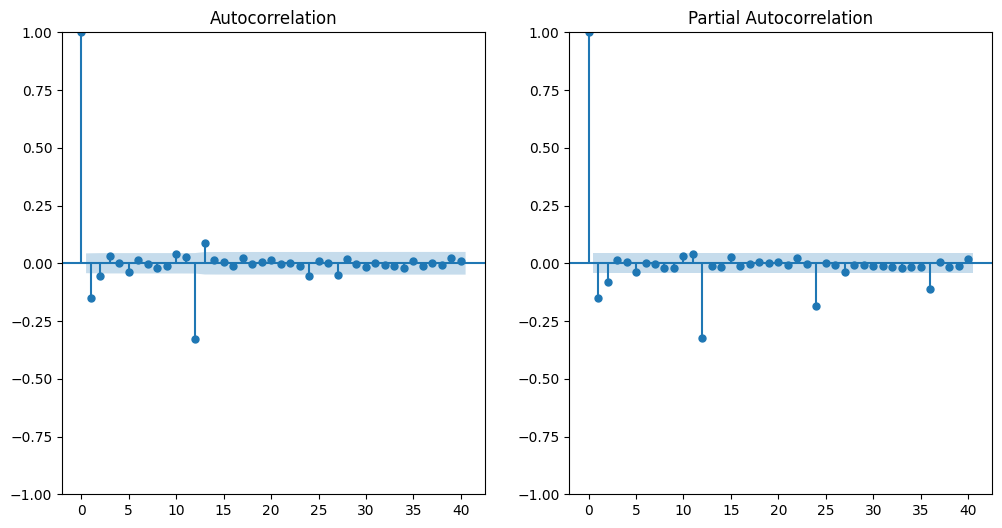

                                     SARIMAX Results                                      
Dep. Variable:                      Closing_price   No. Observations:                 2082
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2072.020
Date:                            Sun, 24 Nov 2024   AIC                           4156.041
Time:                                    15:47:53   BIC                           4189.809
Sample:                                         0   HQIC                          4168.423
                                           - 2082                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Date_numeric  9.016e-08   3.09e-07      0.292      0.770   -5.15e-07    6.95e-07
ar.L1            0.6237      

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Ensure 'Date' is in datetime format
gbp_inr['Date'] = pd.to_datetime(gbp_inr['Date'])

# Convert 'Date' to numeric (timestamp)
gbp_inr['Date_numeric'] = gbp_inr['Date'].apply(lambda x: x.timestamp())

# Define the target column
target = 'Closing_price'

# Train-Test Split (80%-20%)
train_size = int(len(gbp_inr) * 0.8)
train, test = gbp_inr[:train_size], gbp_inr[train_size:]

# Hyperparameters for SARIMA
p, d, q = 1, 1, 1  # AR, I, MA order
P, D, Q, S = 1, 1, 1, 12  # Seasonal AR, I, MA order, and period

# SARIMA Model: SARIMAX for seasonal data
sarima_model = SARIMAX(train[target],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, S),
                       exog=train[['Date_numeric']],  # Include 'Date_numeric' as an exogenous variable
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit()

# Make predictions
predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False, exog=test[['Date_numeric']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test[target], label="Actual", color='blue')
plt.plot(test['Date'], predictions, label="Predicted", color='red', linestyle="--")
plt.legend()
plt.title("SARIMA Model: Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Evaluate the model with RMSE
rmse_val = rmse(test[target], predictions)
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")

# Plot residuals to check for patterns
residuals = sarima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("SARIMA Model Residuals")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.show()

# Optional: Print out model diagnostics
print(sarima_fit.summary())


## FBProphet

In [58]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 187.9 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 196.9 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 196.9 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 145.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 159.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.3 MB 2.0 MB/s eta 0:00:07
    --------------------------------------- 0.2/13.3 MB 2.2 MB/s eta 0:00:07
   


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
# Calculate MAE, MSE, RMSE, and MAPE for the train and test sets
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    accuracy = 100 - mape  # Accuracy-like score as (100% - MAPE)

    return mae, mse, rmse, mape, accuracy

In [60]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
df = gbp_inr  # Replace this with your data
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)
df.dropna(inplace=True)

# Add the 'cap' column for logistic growth (set it to the max of 'y')
df['cap'] = df['y'].max()

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Set up the hyperparameters grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'seasonality_prior_scale': [1, 10, 20],
    'holidays_prior_scale': [10, 15, 20],
    'changepoint_range': [0.8, 0.9],
    'growth': ['linear', 'logistic']  # Will test both linear and logistic growth
}

# Initialize variables to store the best model and best score
best_model = None
best_score = float('inf')
best_params = {}

# Grid Search Loop
for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
    for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
        for holidays_prior_scale in param_grid['holidays_prior_scale']:
            for changepoint_range in param_grid['changepoint_range']:
                for growth in param_grid['growth']:
                    # Initialize Prophet with the current set of hyperparameters
                    prophet_model = Prophet(
                        changepoint_prior_scale=changepoint_prior_scale,
                        seasonality_prior_scale=seasonality_prior_scale,
                        holidays_prior_scale=holidays_prior_scale,
                        changepoint_range=changepoint_range,
                        growth=growth
                    )

                    # If logistic growth, add the 'cap' column
                    if growth == 'logistic':
                        prophet_model.fit(train[['ds', 'y', 'cap','Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band']])
                    else:
                        prophet_model.fit(train[['ds', 'y','Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band']])

                    # Create future dataframe for predictions
                    future = prophet_model.make_future_dataframe(periods=len(test))

                    # Add the 'cap' column for logistic growth
                    if growth == 'logistic':
                        future['cap'] = df['cap'].iloc[0]  # Same constant value as for training

                    forecast = prophet_model.predict(future)

                    # Evaluate model performance on the test set
                    test_yhat = forecast['yhat'][-len(test):].values
                    mae, mse, rmse, mape, accuracy = evaluate_model(test['y'].values, test_yhat)

                    # If the model has better performance, store it
                    if mse < best_score:
                        best_score = mse
                        best_model = prophet_model
                        best_params = {
                            'changepoint_prior_scale': changepoint_prior_scale,
                            'seasonality_prior_scale': seasonality_prior_scale,
                            'holidays_prior_scale': holidays_prior_scale,
                            'changepoint_range': changepoint_range,
                            'growth': growth
                        }

# Output the best hyperparameters and score
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_score)

# Evaluate the best model on the test set
best_forecast = best_model.predict(best_model.make_future_dataframe(periods=len(test)))
test_yhat = best_forecast['yhat'][-len(test):].values
mae, mse, rmse, mape, accuracy = evaluate_model(test['y'].values, test_yhat)

print("Test Metrics for Best Model:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, Accuracy: {accuracy:.2f}%")


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

15:49:01 - cmdstanpy - INFO - Chain [1] start processing
15:49:02 - cmdstanpy - INFO - Chain [1] done processing
15:49:04 - cmdstanpy - INFO - Chain [1] start processing
15:49:04 - cmdstanpy - INFO - Chain [1] done processing
15:49:12 - cmdstanpy - INFO - Chain [1] start processing
15:49:13 - cmdstanpy - INFO - Chain [1] done processing
15:49:14 - cmdstanpy - INFO - Chain [1] start processing
15:49:14 - cmdstanpy - INFO - Chain [1] done processing
15:49:22 - cmdstanpy - INFO - Chain [1] start processing
15:49:23 - cmdstanpy - INFO - Chain [1] done processing
15:49:24 - cmdstanpy - INFO - Chain [1] start processing
15:49:24 - cmdstanpy - INFO - Chain [1] done processing
15:49:32 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done pr

Best Hyperparameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1, 'holidays_prior_scale': 10, 'changepoint_range': 0.8, 'growth': 'linear'}
Best MSE: 169.6468953971378
Test Metrics for Best Model:
MAE: 11.9091, MSE: 169.6469, RMSE: 13.0249, MAPE: 11.30%, Accuracy: 88.70%


In [61]:
best_model.params

OrderedDict([('lp__', array([[6575.21]])),
             ('k', array([[0.516738]])),
             ('m', array([[0.901587]])),
             ('delta',
              array([[-3.24870e-08, -1.57900e-08, -5.08529e-01, -8.07633e-01,
                      -4.07234e-01, -5.09874e-05,  3.51393e-08,  5.04800e-01,
                       8.00188e-01,  5.12115e-01, -1.04018e-08, -5.02742e-09,
                      -2.31645e-07, -3.15534e-01, -5.40447e-01, -1.27500e-03,
                      -4.96888e-08,  2.28248e-01,  5.53353e-01,  1.09635e-04,
                       9.78450e-02,  8.57722e-02,  4.96978e-02, -2.48349e-09,
                      -1.13185e+00]])),
             ('sigma_obs', array([[0.018859]])),
             ('beta',
              array([[ 2.72615e-03,  3.14229e-03, -2.80379e-03,  8.62031e-04,
                       2.05126e-03,  4.96979e-04, -1.02438e-03, -3.95593e-03,
                      -5.61079e-04, -1.60717e-03, -1.81370e-03,  2.26868e-04,
                       3.90828e-04,  1.

In [72]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
# Ensure your dataset has columns like 'Date', 'Closing_price', 'RSI', 'MACD', etc.
df = gbp_inr  # Replace `gbp_inr` with your actual dataframe variable
print("Columns in dataset:", df.columns)

# Rename columns as Prophet requires 'ds' (date) and 'y' (target)
df.rename(columns={'Date': 'ds', 'Closing_price': 'y'}, inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Specify the additional regressors
regressors = [
    'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
    'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
    'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band', 'Lower Band'
]

# Ensure all specified regressors are present in the dataset
missing_regressors = [r for r in regressors if r not in df.columns]
if missing_regressors:
    raise ValueError(f"Missing regressors in dataset: {missing_regressors}")

# Initialize the Prophet model with tuned hyperparameters
prophet_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    changepoint_range=best_params['changepoint_range'],
    growth=best_params['growth']
)

# Set the random state for reproducibility
prophet_model.random_state = 42

# Add each regressor to the Prophet model
for regressor in regressors:
    prophet_model.add_regressor(regressor)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]


# Train the model
#best_model.fit(train[['ds', 'y'] + regressors ])

# Create a future dataframe for predictions
future = best_model.make_future_dataframe(periods=len(test))
for regressor in regressors:
    future[regressor] = df[regressor]



# Make predictions
forecast = best_model.predict(future)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    return mae, mse, rmse, mape, accuracy

# Evaluate on train and test sets
train_forecast = best_model.predict(train[['ds'] + regressors ])
train_yhat = train_forecast['yhat'].values
train_metrics = evaluate_model(train['y'].values, train_yhat)

test_forecast = best_model.predict(test[['ds'] + regressors ])
test_yhat = test_forecast['yhat'].values
test_metrics = evaluate_model(test['y'].values, test_yhat)

# Print metrics
print("Train Metrics:")
print(f"MAE: {train_metrics[0]:.4f}, MSE: {train_metrics[1]:.4f}, RMSE: {train_metrics[2]:.4f}, MAPE: {train_metrics[3]:.2f}%, Accuracy: {train_metrics[4]:.2f}%")
print("\nTest Metrics:")
print(f"MAE: {test_metrics[0]:.4f}, MSE: {test_metrics[1]:.4f}, RMSE: {test_metrics[2]:.4f}, MAPE: {test_metrics[3]:.2f}%, Accuracy: {test_metrics[4]:.2f}%")

# Plot predictions vs actual values
fig = go.Figure()

# Plot actual values
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Plot predicted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted', line=dict(color='red')))

# Plot upper and lower bounds
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound',
    line=dict(color='lightgrey', dash='dot')
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound',
    line=dict(color='lightgrey', dash='dot')
))

# Update layout
fig.update_layout(
    title="Prophet with Regressors: Predictions vs Actual",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()


Columns in dataset: Index(['ds', 'Open_price', 'Day_high', 'Day_low', 'y', 'Currency Pair',
       'Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_100', 'EMA_200', 'EMA_50', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band', 'Date_numeric', 'cap'],
      dtype='object')
Train Metrics:
MAE: 1.5594, MSE: 3.9241, RMSE: 1.9809, MAPE: 1.67%, Accuracy: 98.33%

Test Metrics:
MAE: 13.8226, MSE: 228.7806, RMSE: 15.1255, MAPE: 13.11%, Accuracy: 86.89%


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [71]:
pip install nbformat


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [67]:
pip install --upgrade nbformat --user


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
 pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.8 MB 217.9 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.8 MB 217.9 kB/s eta 0:00:09
   -- ------------------------------------- 0.1/1.8 MB 467.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 577.4 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 623.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.8 MB 744.2 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 733.3 kB/s eta 0:00:03
   -------- ------------------------------- 0.4/1.8 MB 849.3 kB/s eta 0:00:02
   -------- -

SyntaxError: invalid syntax (767632296.py, line 1)